In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


# Data Exploration

In [44]:
data = '/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv'
df = pd.read_csv(data)
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [45]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [46]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [47]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(df: pd.DataFrame, features:list):
    '''For the two features in feature, make a boxplot of the classes vs. feature'''
    if len(features) != 2:
        return 
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
    sns.boxplot(data=df, x=features[0], y='class', ax=axes[0])
    axes[0].set_title(f'{features[0]} Percentiles', weight='bold')
    axes[0].set_ylabel('Object Classes')
    axes[0].set_xlabel(features[0])
    axes[0].grid(axis='x')
    
    sns.boxplot(data=df, x=features[1], y='class', ax=axes[1])
    axes[1].set_title(f'{features[1]} Percentiles', weight='bold')
    axes[1].set_ylabel('Object Classes')
    axes[1].set_xlabel(features[1])
    axes[1].grid(axis='x')
    
    lower_bound_feat1 = df[features[0]].min() - 10
    upper_bound_feat1 = df[features[0]].max() + 5
    
    lower_bound_feat2 = df[features[1]].min() - 10
    upper_bound_feat2 = df[features[1]].max() + 5
    
    axes[0].set(xlim=(lower_bound_feat1, upper_bound_feat1))
    axes[1].set(xlim=(lower_bound_feat2, upper_bound_feat2))
    
    
#     axes[0].set(xlim=(lower_bound_feat1, upper_bound_feat1))
#     axes[1].set(xlim=(lower_bound_feat2, upper_bound_feat2))
    
    fig.tight_layout()
    plt.show()

In [49]:
series = df['class'].value_counts(normalize=True)
for index in series.index:
    print(f'{index}: {series[index]:.2f}')

GALAXY: 0.59
STAR: 0.22
QSO: 0.19


In [50]:
def pie_chart(df:pd.DataFrame, feature:str, palette:str):
    proportion_series = df[feature].value_counts(normalize=True) # for pie  
    colors = sns.color_palette(palette)
    plt.pie(x=[proportion_series[index] for index in proportion_series.index], labels=[index for index in proportion_series.index], colors= colors, autopct='%.1f%%')
    plt.show()

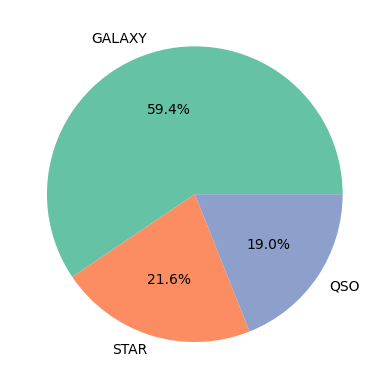

In [51]:
pie_chart(df, 'class', 'Set2')

<Axes: xlabel='class'>

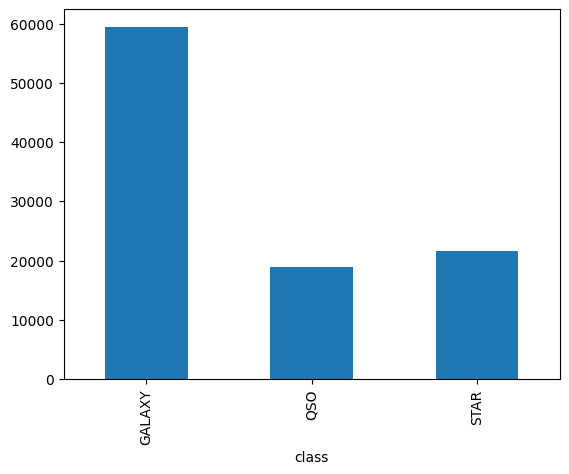

In [52]:
df['class'].value_counts(sort=False).plot.bar() 
# The distribution of classes is extremely skewed, with the number of galaxies beign 3x that of quasars and stars. 
# We will have to deal with this before training the models

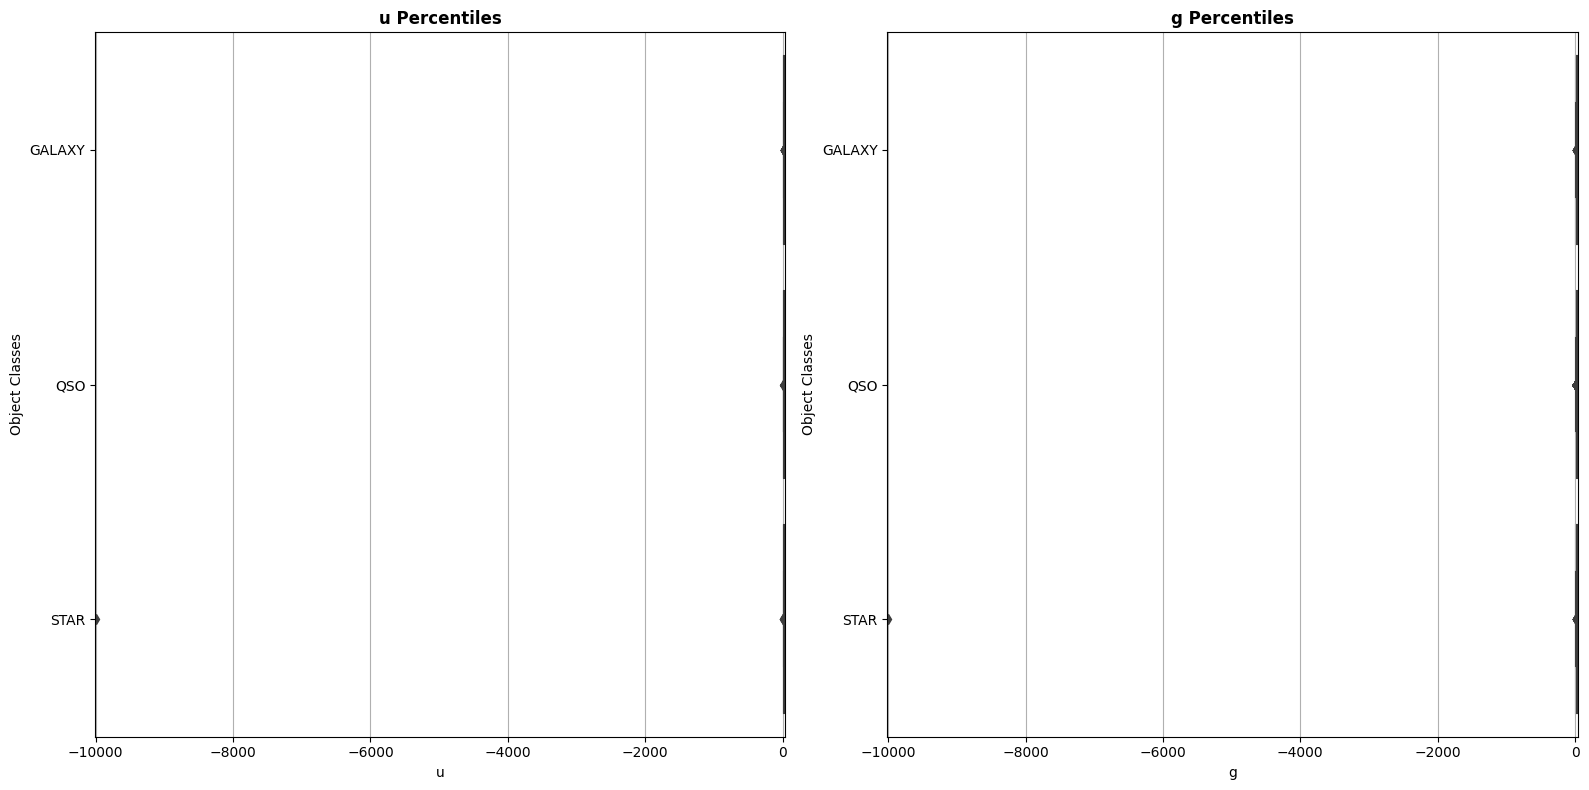

In [53]:
box_plot(df, ['u', 'g']) # there is a single outlier here: a star with a u and g value of -9999. Let's remove it

In [54]:
# Let's get rid of the
min_index = df['u'].idxmin()
df.loc[min_index]

obj_ID         1237648703521095936.0
alpha                     224.006526
delta                      -0.624304
u                            -9999.0
g                            -9999.0
r                            18.1656
i                           18.01675
z                            -9999.0
run_ID                           752
rerun_ID                         301
cam_col                            2
field_ID                         537
spec_obj_ID    3731276904880250368.0
class                           STAR
redshift                    0.000089
plate                           3314
MJD                            54970
fiber_ID                         162
Name: 79543, dtype: object

In [55]:
df = df.drop(min_index)

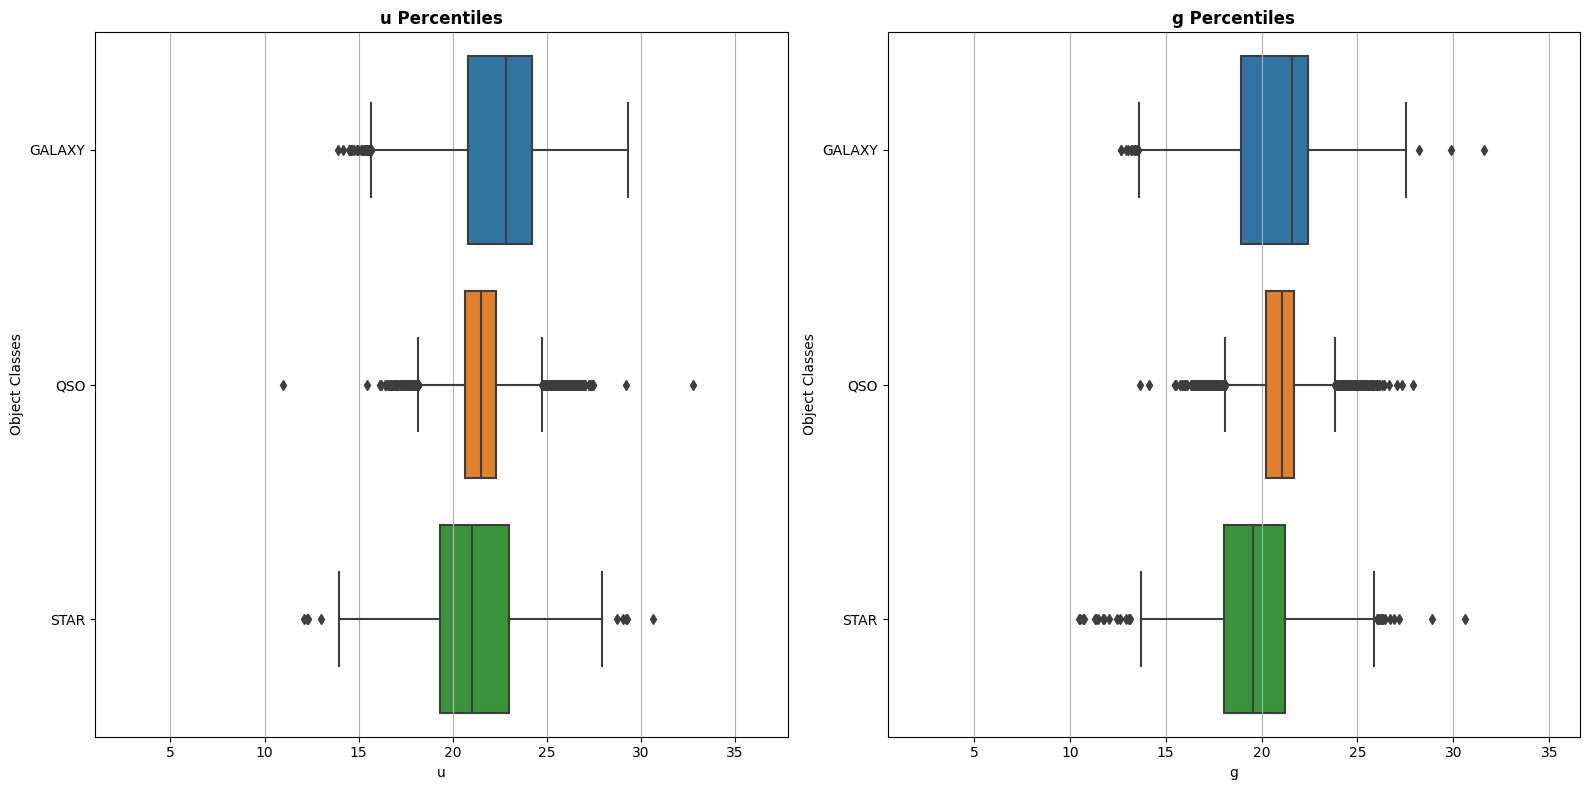

In [56]:
box_plot(df, ['u', 'g']) # the plot without the extreme outlier looks much better 

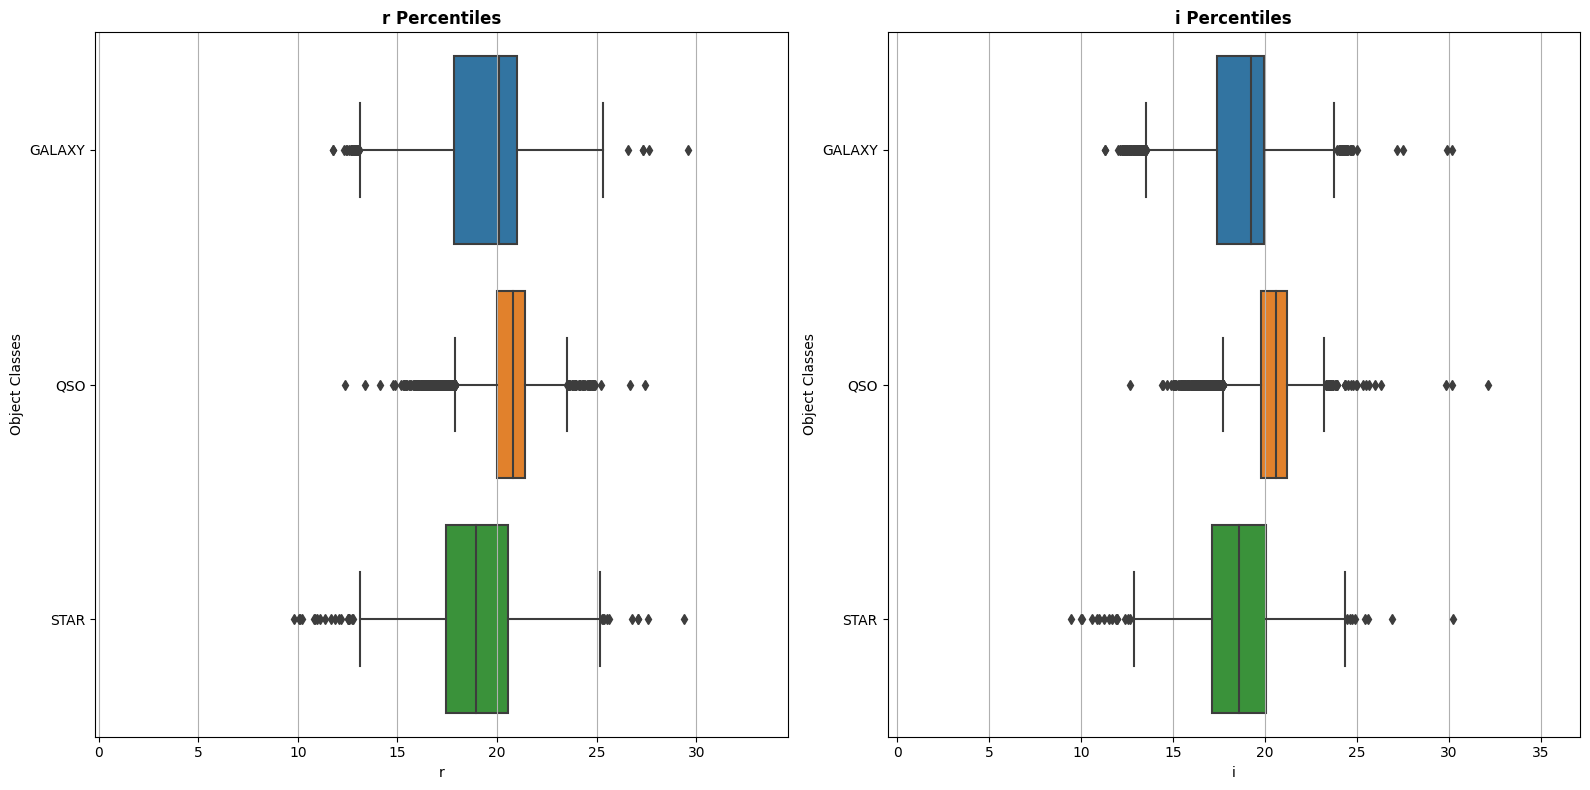

In [57]:
box_plot(df, ['r', 'i'])

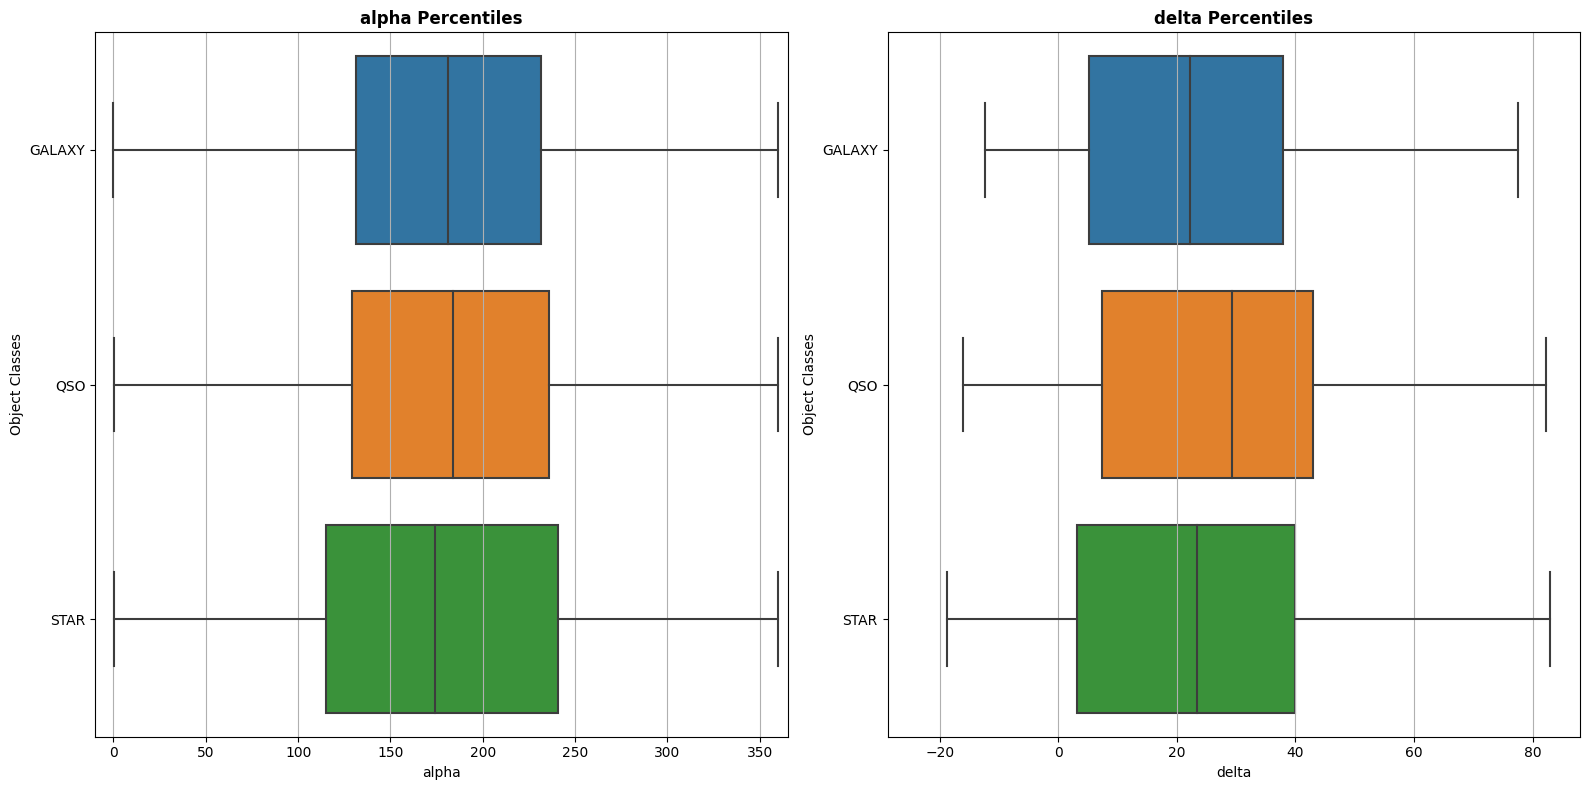

In [58]:
box_plot(df, ['alpha', 'delta'])

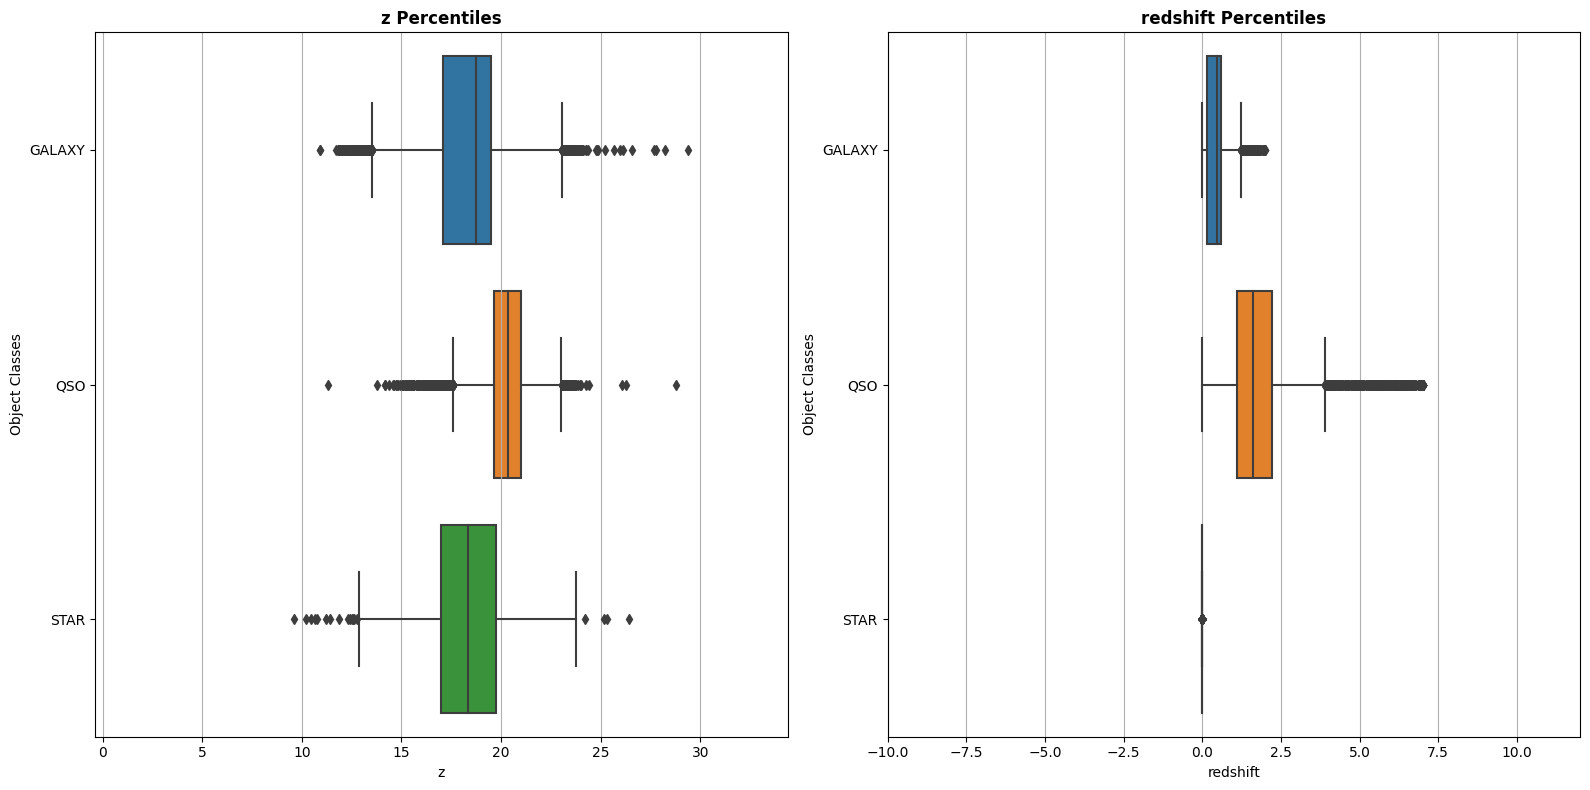

In [59]:
box_plot(df, ['z', 'redshift']) # note that our outlier was also messing with the Z box plots.

Pretty cool observations we can make here: 
   - Quasars are to be the most redshifted class of objects, making them the farthest from us (also the oldest, I think?)
   - Stars are virtually not redshifted: they're the closest observed objects in the set.

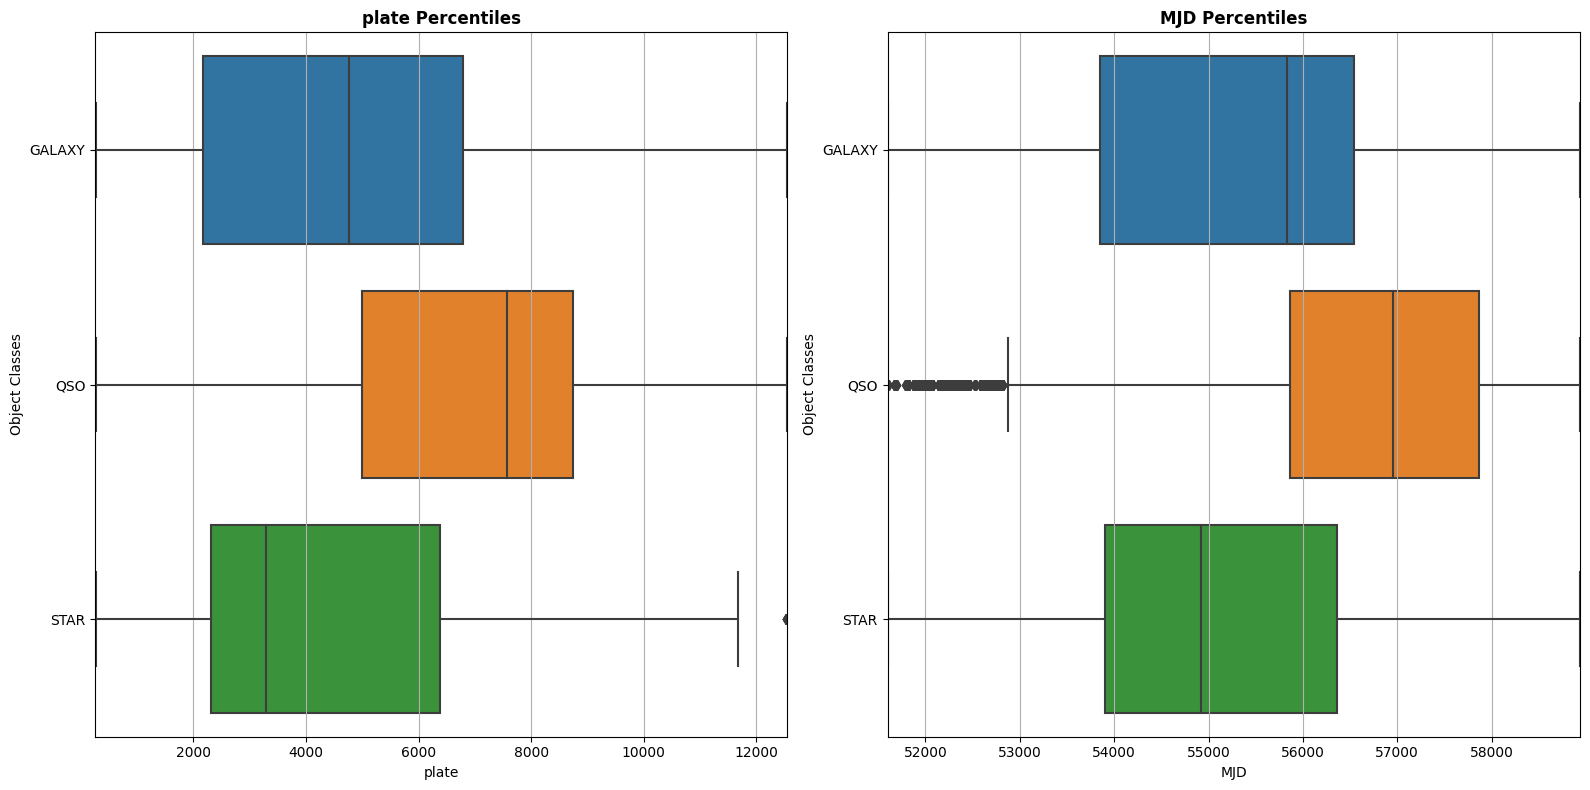

In [60]:
box_plot(df, ['plate', 'MJD'])

Again, seems we can make some clean seperations using the 'plate' and 'MJD' features. 

MJD stands for 'Modified Julian Date'. It's given by

\begin{equation}
\text{MJD} = \text{JD} - 2 400 000.5 \text{ days},
\end{equation}

where JD stands for the standard Julian Date. It's a standarized way of giving time labels to observations, as it gives the number of days since midnight on November 17, 1858. From the MJD box plot, we see that Galaxie and Star observations span over the same time period; wheras most of the Quasar observations are more recent. A number of ways this could be explained: perhaps we had to wait for technology and observation techniques to catch up before being able to see most quasars, or perhaps we simply needed to wait for their light to get to us in the first place (as they are quite far, as told by the redshift box plot). Or, I am reading too much into things and it's a simple coincidence!

The other feature is 'plate'. This has to do with how data from the Sloan Digital Sky Survey was collected I believe; plates were used to collect the light from astrophysical objects. 

I have my doubts when it comes to using these two features for training a model; they don't really have anything to do with the stellar objects themselves is what I think at this point. They're more so a reflection of the methodology used to collect the data. I am not disqualifying them just yet, especially the plate feature.

In [61]:
# To truly understand the different photometric filters, I want to see how they correlate, pairwise.
def pairwise_corr_plot(df: pd.DataFrame, features:list, target:str):
    numeric_columns = df[features]
    hue_column = df[target]
    
    plot_data = pd.concat([numeric_columns, hue_column], axis=1)
    
    sns.pairplot(data=plot_data, hue=target ,kind='reg', diag_kind='kde')
    plt.show()

In [62]:
# pairwise_corr_plot(df, ['u', 'g', 'r', 'i', 'z'], 'class') 
# rendering this plot was more computationally intensive than training my model, I swear..

In [63]:
numeric_columns = df[['u', 'g', 'r', 'i', 'z']]
df_corr = numeric_columns.corr()
df_corr

,u,g,r,i,z
u,1.000000,0.853350,0.728681,0.618346,0.545760
g,0.853350,1.000000,0.932996,0.847046,0.775302
r,0.728681,0.932996,1.000000,0.962868,0.919114
i,0.618346,0.847046,0.962868,1.000000,0.971546
z,0.545760,0.775302,0.919114,0.971546,1.000000


# Preprocessing

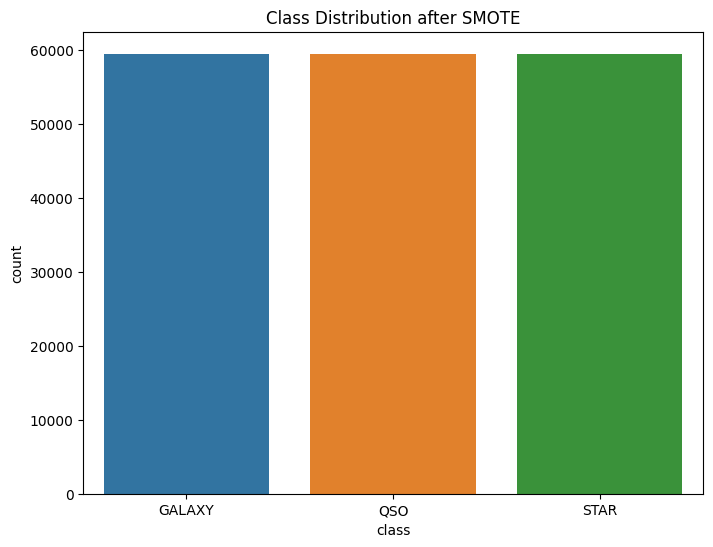

In [64]:
# Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# read in a fresh data set
df_fresh = pd.read_csv(data)

X = df_fresh.drop('class', axis=1)
y = df_fresh['class']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# looking at the new class distribution post-smote
y_smote_df = pd.DataFrame(y_smote, columns=['class'])

plt.figure(figsize=(8, 6))
sns.countplot(data=y_smote_df, x='class')
plt.title('Class Distribution after SMOTE')
plt.show()

In [65]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

X_train

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
64241,1.237668e+18,172.940268,18.836668,26.864340,21.684690,19.959950,18.909540,18.405730,5313,301,2,91,6.619235e+18,0.532354,5879,56047,251
19376,1.237667e+18,139.209352,21.516077,22.306000,22.668120,22.137620,21.210210,20.462100,5061,301,3,170,1.079750e+19,0.839436,9590,57813,444
57229,1.237661e+18,122.021033,24.550929,24.628010,21.816500,20.164410,19.284090,18.870930,3560,301,4,92,5.031830e+18,0.487199,4469,55863,665
115421,1.237655e+18,169.462340,57.980547,20.520162,20.045529,20.085821,19.847887,19.890001,2243,301,1,282,9.213337e+18,1.820988,8183,57375,354
151845,1.237680e+18,352.526487,27.079751,25.092810,20.433541,19.634012,19.411735,19.427708,8103,301,4,51,7.094460e+18,-0.000169,6301,56543,598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.237664e+18,214.964917,34.871037,21.294728,20.800215,20.641989,20.486683,20.245791,4390,301,4,104,1.211229e+19,1.981258,10757,58220,331
103694,1.237663e+18,241.668140,55.716500,20.640484,19.674721,18.839933,18.490954,18.079507,4011,301,2,63,7.648366e+18,0.371593,6793,56430,465
131932,1.237662e+18,182.544890,43.230114,22.555935,21.331390,21.012214,21.004922,21.009433,3879,301,5,162,9.426094e+18,2.746865,8372,57787,217
146867,1.237666e+18,270.695668,24.213904,20.762645,19.172373,18.547624,18.316193,18.240229,4832,301,4,127,2.471435e+18,-0.000157,2195,54234,309


In [66]:
# A class to be used in our transformation pipeline. Adds custom features.
from sklearn.base import BaseEstimator, TransformerMixin

class ColorIndicesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        X['u - g'] = X['u'] - X['g']
        X['g - r'] = X['g'] - X['r']
        return X

In [67]:
# also for our pipeline; will convert the array back into a DataFrame
class ToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('custom_features', ColorIndicesAdder()),
    ('std_scaler', StandardScaler()),
])

X_train_ready = num_pipeline.fit_transform(X_train)
X_train_ready

array([[ 4.29075464e-01, -4.90523127e-02, -2.93799159e-01, ...,
        -7.59937471e-01,  3.63314159e+00,  3.00047889e-02],
       [ 3.00382577e-01, -3.94710516e-01, -1.58413857e-01, ...,
        -2.28773026e-02, -1.52934162e+00, -2.63207084e-03],
       [-4.66478024e-01, -5.70848141e-01, -5.06872183e-03, ...,
         8.21113875e-01,  1.42708053e+00,  2.80193690e-02],
       ...,
       [-3.02928696e-01,  4.93712262e-02,  9.38753844e-01, ...,
        -8.89782268e-01, -5.12698307e-02, -8.40727189e-03],
       [ 1.83456828e-01,  9.52697986e-01, -2.20979346e-02, ...,
        -5.38437524e-01,  2.89425504e-01, -5.63874214e-05],
       [-8.39146533e-01, -2.99480273e-01,  1.30024345e+00, ...,
         2.08901012e+00, -1.35710150e+00, -1.54686295e-02]])

In [69]:
# Let's see how it looks
X_train_df = ToDataFrame(columns=X_train.columns).fit_transform(X_train_ready) 
X_train_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,u - g,g - r
0,0.429075,-0.049052,-0.293799,0.142810,0.036423,0.133732,-0.214415,-0.013042,0.429221,0.0,-0.924286,-0.649102,0.170529,-0.207232,0.170562,0.176668,-0.759937,3.633142,0.030005
1,0.300383,-0.394711,-0.158414,0.018450,0.063264,1.364592,1.120964,0.043102,0.300464,0.0,-0.270863,-0.091692,1.405786,0.140083,1.405807,1.156368,-0.022877,-1.529342,-0.002632
2,-0.466478,-0.570848,-0.005069,0.081799,0.040021,0.249297,0.002985,-0.000341,-0.466458,0.0,0.382561,-0.642046,-0.298769,-0.258303,-0.298772,0.074593,0.821114,1.427081,0.028019
3,-1.139573,-0.084692,1.684064,-0.030272,-0.008314,0.204877,0.330230,0.027482,-1.139366,0.0,-1.577710,0.698560,0.937446,1.250235,0.937472,0.913385,-0.366584,-0.749858,-0.018231
4,1.854731,1.791261,0.122708,0.094479,0.002276,-0.050494,0.077074,0.014861,1.854744,0.0,0.382561,-0.931335,0.311024,-0.809525,0.311029,0.451827,0.565243,3.148377,0.004720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142663,-0.042255,0.381596,0.516386,-0.009140,0.012283,0.519233,0.701007,0.037196,-0.042377,0.0,0.382561,-0.557377,1.794489,1.431504,1.794255,1.382154,-0.454420,-0.731338,-0.012806
142664,-0.236138,0.655238,1.569666,-0.026989,-0.018435,-0.499322,-0.457375,-0.021948,-0.236023,0.0,-0.924286,-0.846665,0.474780,-0.389055,0.474796,0.389140,0.057321,-0.292341,0.005684
142665,-0.302929,0.049371,0.938754,0.025268,0.026781,0.728492,1.001808,0.058045,-0.303468,0.0,1.035984,-0.148139,1.000345,2.297418,1.000383,1.141944,-0.889782,-0.051270,-0.008407
142666,0.183457,0.952698,-0.022098,-0.023656,-0.032145,-0.664541,-0.558812,-0.017560,0.183458,0.0,0.382561,-0.395093,-1.055721,-0.809511,-1.055696,-0.829106,-0.538438,0.289426,-0.000056


In [70]:
# pre-processing targets
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_train_df = pd.DataFrame(y_train_encoded.toarray(), columns=encoder.categories_[0])

y_train_df

,GALAXY,QSO,STAR
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
142663,0.0,1.0,0.0
142664,0.0,1.0,0.0
142665,0.0,1.0,0.0
142666,0.0,0.0,1.0


# Model Selection and Training

## First model: Simple Support Vector Machine Classifier

In [71]:
X_train_ready.shape

(142668, 19)

In [72]:
y_train_encoded.shape

(142668, 3)

In [73]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_ready, y_train)

SVC()

In [74]:
X_test.iloc[514]

obj_ID         1.237661e+18
alpha          2.181358e+02
delta          5.154279e+01
u              2.359859e+01
g              2.216456e+01
r              2.109276e+01
i              2.009441e+01
z              1.946379e+01
run_ID         3.712000e+03
rerun_ID       3.010000e+02
cam_col        1.000000e+00
field_ID       2.220000e+02
spec_obj_ID    9.462202e+18
redshift       8.123496e-01
plate          8.404000e+03
MJD            5.748100e+04
fiber_ID       5.050000e+02
Name: 31255, dtype: float64

In [75]:
y_test.iloc[514]

'GALAXY'

In [76]:
X_test_ready = num_pipeline.transform(X_test)
predicit_514 = svm_classifier.predict(X_test_ready[514].reshape(1, -1))
predicit_514 # it works, cool!

array(['GALAXY'], dtype=object)

In [77]:
# I do not aim for svm as my final classifier, so this is all the testing I will do for it.
from sklearn.metrics import accuracy_score

y_pred = svm_classifier.predict(X_test_ready)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967589087952449


## Second Model: Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_ready, y_train) 

RandomForestClassifier()

In [79]:
# testing accuracy using cross-validation on 5 folds
from sklearn.model_selection import cross_val_score

cross_val_score(rf_clf, X_train_ready, y_train, cv=5, scoring='accuracy')

array([0.98331815, 0.98286255, 0.98170603, 0.98377317, 0.9822311 ])

In [80]:
# Preparing data for confusion matrix 
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf, X_train_ready, y_train, cv=5)
y_train_pred

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'QSO', 'STAR', 'QSO'],
      dtype=object)

In [81]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_pred)
matrix 

array([[46480,   829,   330],
       [ 1280, 46298,     2],
       [    4,     0, 47445]])

Text(95.72222222222221, 0.5, 'Truth')

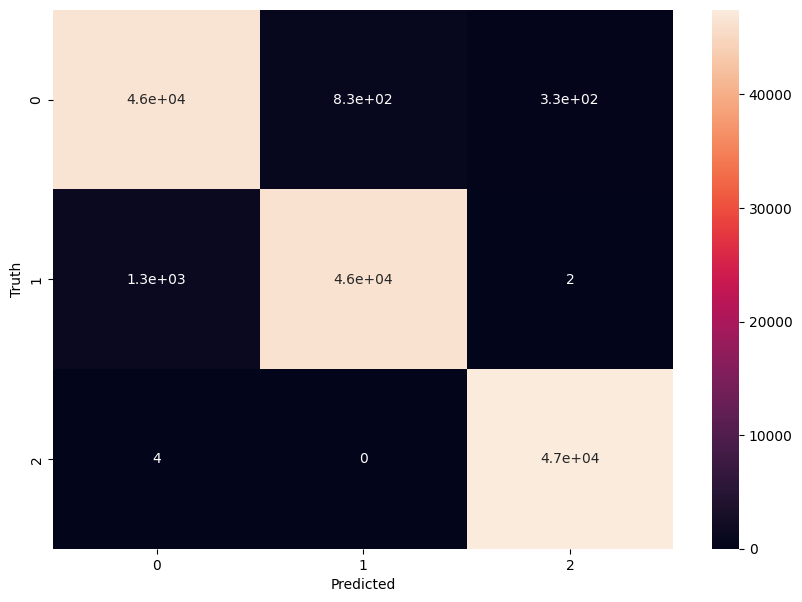

In [83]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

A cool use of Random Forests: they let us compute feature importance. Let's do that. I am curious to see if my custom features were of any use to the model, or if their addition was actually counter-productive.

In [84]:
d = {}
for name, score in zip(X_train.columns, rf_clf.feature_importances_):
    d[name] = score
    
sorted(d.items(), key=lambda x:x[1], reverse=True)

[('redshift', 0.5266331367699625),
 ('g - r', 0.114698127709112),
 ('u - g', 0.07209721554907815),
 ('z', 0.051910921154594176),
 ('g', 0.04219532177058245),
 ('i', 0.03689080964211712),
 ('r', 0.03488297700023804),
 ('spec_obj_ID', 0.02553192721012736),
 ('plate', 0.02118308424883285),
 ('u', 0.02078870215427555),
 ('MJD', 0.019901603298377046),
 ('alpha', 0.007088576079084374),
 ('delta', 0.006685757062514134),
 ('obj_ID', 0.0051897569021848175),
 ('run_ID', 0.0045952231972150115),
 ('field_ID', 0.0040802483631076445),
 ('fiber_ID', 0.003890212798580952),
 ('cam_col', 0.0017563990900159427),
 ('rerun_ID', 0.0)]

Not bad! Our custom "g - r" and "u - g" features are the 2nd and 3rd most important to the model, accounting for ~ 12% and ~ 7% of each of its classification decisions. What we can do now is drop unimportant features (< 1% score) in order to optimize training. Some of these are obvious candidates for cropping (identifiers); I messed up by keeping them.

In [ ]:
# print(classification_report(y_test, y_predicted))

In [ ]:
X_train_cropped = X_train.drop(['rerun_ID', 'cam_col', 'run_ID', 'field_ID', 'fiber_ID', 'obj_ID', 'delta', 'alpha'], axis=1)
X_train_cropped